In [1]:
# Fonots

# Használathoz fel kell tölteni a mylog.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

In [4]:
df = pd.read_csv('MyLog/mylog_1vcpu.log', sep=' ', header=1)

In [6]:
columns = df.columns

In [7]:
df = pd.read_csv('MyLog/mylog_copy.log', sep=' ', header=1)

In [8]:
df.columns = columns

In [9]:
df.head()

,#Date,Time,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%,[CPU:0]Wait%,[CPU:0]Irq%,[CPU:0]Soft%,[CPU:0]Steal%,[CPU:0]Idle%,...,[TCPD]OutTimeExcds,[TCPD]OutParmProbs,[TCPD]OutSrcQuenchs,[TCPD]OutRedirects,[TCPD]OutEchos,[TCPD]OutEchoReps,[TCPD]OutTimestamps,[TCPD]OutTimestampReps,[TCPD]OutAddrMasks,[TCPD]OutAddrMaskReps
0,20230531,15:53:55,1,0,1,0,0,0,0,98,...,0,0,0,0,0,0,0,0,0,0
1,20230531,15:53:56,2,0,0,0,0,0,0,98,...,0,0,0,0,0,0,0,0,0,0
2,20230531,15:53:57,0,0,0,1,0,0,0,99,...,0,0,0,0,0,0,0,0,0,0
3,20230531,15:53:58,1,0,0,0,0,0,0,99,...,0,0,0,0,0,0,0,0,0,0
4,20230531,15:53:59,1,0,0,0,0,0,0,99,...,0,0,0,0,0,0,0,0,0,0


In [10]:
ndf = df.copy()
ndf['#Date'] = pd.to_datetime(df['#Date'], format='%Y%m%d')
ndf['Time'] = pd.to_datetime(ndf['Time'], format='%H:%M:%S').dt.time

print(df.info())
ndf.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Columns: 105 entries, #Date to [TCPD]OutAddrMaskReps
dtypes: float64(1), int64(102), object(2)
memory usage: 2.2+ MB
None


,#Date,Time,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%,[CPU:0]Wait%,[CPU:0]Irq%,[CPU:0]Soft%,[CPU:0]Steal%,[CPU:0]Idle%,...,[TCPD]OutTimeExcds,[TCPD]OutParmProbs,[TCPD]OutSrcQuenchs,[TCPD]OutRedirects,[TCPD]OutEchos,[TCPD]OutEchoReps,[TCPD]OutTimestamps,[TCPD]OutTimestampReps,[TCPD]OutAddrMasks,[TCPD]OutAddrMaskReps
0,2023-05-31,15:53:55,1,0,1,0,0,0,0,98,...,0,0,0,0,0,0,0,0,0,0
1,2023-05-31,15:53:56,2,0,0,0,0,0,0,98,...,0,0,0,0,0,0,0,0,0,0
2,2023-05-31,15:53:57,0,0,0,1,0,0,0,99,...,0,0,0,0,0,0,0,0,0,0


In [11]:
zdf = ndf.copy()

zdf['dt'] = ndf['#Date'].astype(str) + ' ' + df['Time'].astype(str).str.zfill(8)

zdf = zdf.rename(columns={'dt': 'datetime'})             # Egyszerű oszlopváltozó átnevezés dt -> datetime

zdf['datetime'] = pd.to_datetime(zdf['datetime'])        # Elkészült a datetime változó ez alapján indexelek majd

zdf['year']   = zdf['datetime'].dt.year
zdf['month']  = zdf['datetime'].dt.month
zdf['day']    = zdf['datetime'].dt.day
zdf['hour']   = zdf['datetime'].dt.hour
zdf['minute'] = zdf['datetime'].dt.minute
zdf['second'] = zdf['datetime'].dt.second

print(zdf['datetime'].min(), zdf['datetime'].max())      # Kezdő és Vég időpont
print(zdf['datetime'].max() - zdf['datetime'].min())     # Ekkora időtartamot fed le

zdf.head()

2023-05-31 15:53:55 2023-05-31 16:40:27
0 days 00:46:32


,#Date,Time,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%,[CPU:0]Wait%,[CPU:0]Irq%,[CPU:0]Soft%,[CPU:0]Steal%,[CPU:0]Idle%,...,[TCPD]OutTimestampReps,[TCPD]OutAddrMasks,[TCPD]OutAddrMaskReps,datetime,year,month,day,hour,minute,second
0,2023-05-31,15:53:55,1,0,1,0,0,0,0,98,...,0,0,0,2023-05-31 15:53:55,2023,5,31,15,53,55
1,2023-05-31,15:53:56,2,0,0,0,0,0,0,98,...,0,0,0,2023-05-31 15:53:56,2023,5,31,15,53,56
2,2023-05-31,15:53:57,0,0,0,1,0,0,0,99,...,0,0,0,2023-05-31 15:53:57,2023,5,31,15,53,57
3,2023-05-31,15:53:58,1,0,0,0,0,0,0,99,...,0,0,0,2023-05-31 15:53:58,2023,5,31,15,53,58
4,2023-05-31,15:53:59,1,0,0,0,0,0,0,99,...,0,0,0,2023-05-31 15:53:59,2023,5,31,15,53,59


In [13]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [35]:
def timeplot(columnname: str):
    plt.figure(figsize=(18, 4))
    plt.plot(zdf['datetime'].iloc[2450:], zdf[columnname].iloc[2450:], label=columnname)
    plt.legend()
    plt.show()

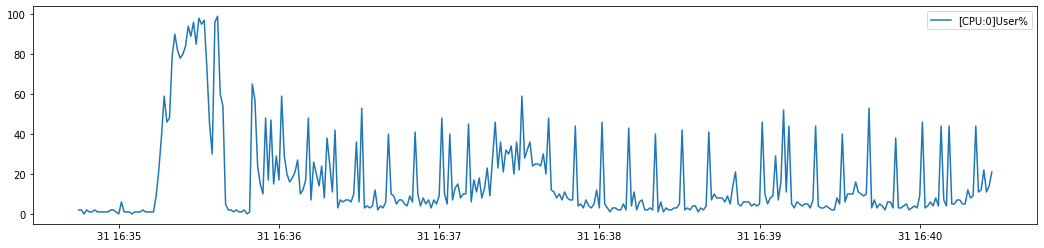

In [36]:
timeplot('[CPU:0]User%')

In [39]:
cols = zdf.columns

interact(timeplot, columnname=cols);

interactive(children=(Dropdown(description='columnname', options=('#Date', 'Time', '[CPU:0]User%', '[CPU:0]Nic…

## Ezen a ponton jöttem rá arra, hogy

Nagyon sok metrika hiányzik azáltal, hogy a collecl parancsot nem úgy adtam ki ahogy kell és a mylog.log filében ezáltal nem azok a metrikák vannak amelyek relevánsak lennének.

## Ezért úgy döntöttem, hogy

Leklonozom az egész Scaler projectet és Dealer néven újra írom és új collectl parancsot adok ki amiben már a jó metrikák lesznek.